<a href="https://colab.research.google.com/github/alpha529/exploratory-data-analysis/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Exploratory Data Analysis on Haberman’s Survival Data**

The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
data = pd.read_csv('haberman.csv')
data.head()


,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


Information about the data set:

In [ ]:
print(data.shape)

print(data.columns)

(306, 4)
Index(['age', 'year', 'nodes', 'status'], dtype='object')


The data set contains 306 data points and 
the 4 columns contain information about:
1. Age of patient at time of operation (numerical)
2. Patient's year of operation (year - 1900, numerical)
3. Number of positive axillary nodes detected (numerical)
4. Survival status (class attribute)

 1 = the patient survived 5 years or longer
 
 2 = the patient died within 5 year

Data Summary

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   age     306 non-null    int64
 1   year    306 non-null    int64
 2   nodes   306 non-null    int64
 3   status  306 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


the above summary shows that all the attributes int the column are int datatype and no null values noted.

renaming the column names for better understanding

In [ ]:
data = data.rename(columns = {'year' : 'operation_year','nodes' : "axillary_lymph_node",'status' : 'survival_status'})
data.head()




,age,operation_year,axillary_lymph_node,survival_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


Statistical summary of the data

In [ ]:
data.describe()

,age,operation_year,axillary_lymph_node,survival_status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


In [ ]:
print(data['survival_status'].value_counts())
status_yes = data[data['survival_status']== 1]
print(status_yes.describe())
print('**************************************************************************')
status_no = data[data['survival_status']== 2]
print(status_no.describe())

1    225
2     81
Name: survival_status, dtype: int64
              age  operation_year  axillary_lymph_node  survival_status
count  225.000000      225.000000           225.000000            225.0
mean    52.017778       62.862222             2.791111              1.0
std     11.012154        3.222915             5.870318              0.0
min     30.000000       58.000000             0.000000              1.0
25%     43.000000       60.000000             0.000000              1.0
50%     52.000000       63.000000             0.000000              1.0
75%     60.000000       66.000000             3.000000              1.0
max     77.000000       69.000000            46.000000              1.0
**************************************************************************
             age  operation_year  axillary_lymph_node  survival_status
count  81.000000       81.000000            81.000000             81.0
mean   53.679012       62.827160             7.456790              2.0
std    10.

Observations:

1. Out of 306 patients, 225 patients survived and 81 did not 
2. The dataset is imbalanced

1. The operation_year and mean age of patients from both the classes are similar.
2. The axillary_lymph_nodes of the patients who survived are less compared to the patients who did not survive







Univaraite analysis(PDF, CDF, Boxplot, Voilin plots)  
1) Probability Density Function

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


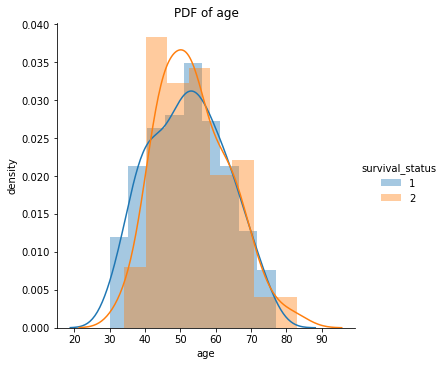

In [ ]:
sns.FacetGrid(data, hue = 'survival_status',height = 5).map(sns.distplot,'age').add_legend()
plt.ylabel('density')
plt.title('PDF of age')
plt.show()

observations:


1.   major overlapping observed,so survival status cannot be determined just by age parameter.



/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


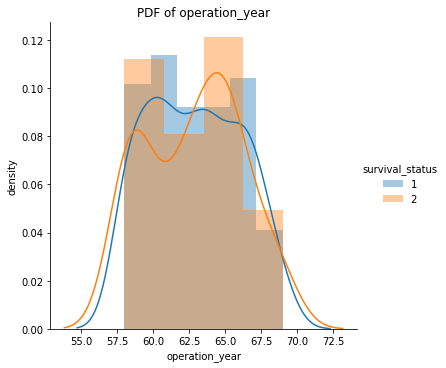

In [ ]:
sns.FacetGrid(data, hue = 'survival_status',height = 5).map(sns.distplot,'operation_year').add_legend()
plt.ylabel('density')
plt.title('PDF of operation_year')
plt.show()

Observations:


1.   major overlapping observed, and the graph only tells the no of operations are successfull or not,which is not sufficient to decide the survival_status
2.   max no of unsuccessfull operations have taken place in the year 1960 and 1965

3. max no of successfull operations have taken place in the year 1961 and 1966





/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


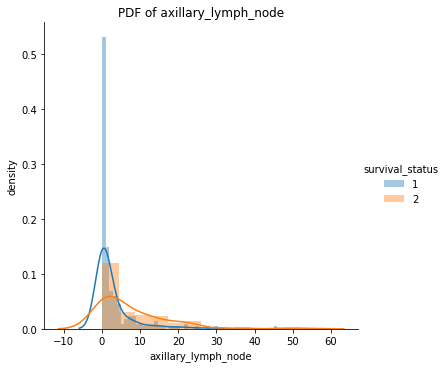

In [ ]:
sns.FacetGrid(data, hue = 'survival_status',height = 5).map(sns.distplot,'axillary_lymph_node').add_legend()
plt.ylabel('density')
plt.title('PDF of axillary_lymph_node')
plt.show()

observation:


1.Patients with no nodes or 1 node are more likely to survive. There are very few chances of surviving if there are 25 or more nodes.



Cumulative distribution function

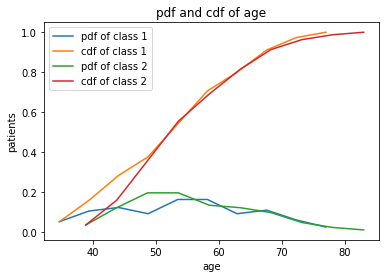

In [ ]:
one = data.loc[data['survival_status']==1]
two = data.loc[data['survival_status']==2]
counts,bin_edges = np.histogram(one['age'],bins =10,density= True)
pdf = counts/sum(counts)
cdf = np.cumsum(pdf)
plt.title('pdf and cdf of age')
plt.xlabel('age')
plt.ylabel('patients')
label = ["pdf of class 1", "cdf of class 1", "pdf of class 2", "cdf of class 2"]
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)

counts,bin_edges = np.histogram(two['age'],bins =10,density= True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)
plt.legend(label)

plt.show()


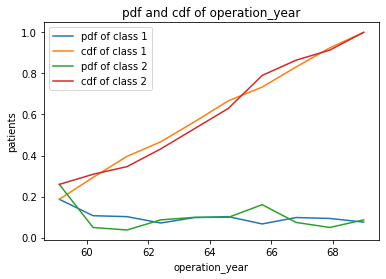

In [ ]:
one = data.loc[data['survival_status']==1]
two = data.loc[data['survival_status']==2]
counts,bin_edges = np.histogram(one['operation_year'],bins =10,density= True)
pdf = counts/sum(counts)
cdf = np.cumsum(pdf)
plt.title('pdf and cdf of operation_year')
plt.xlabel('operation_year')
plt.ylabel('patients')
label = ["pdf of class 1", "cdf of class 1", "pdf of class 2", "cdf of class 2"]
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)

counts,bin_edges = np.histogram(two['operation_year'],bins =10,density= True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)
plt.legend(label)

plt.show()

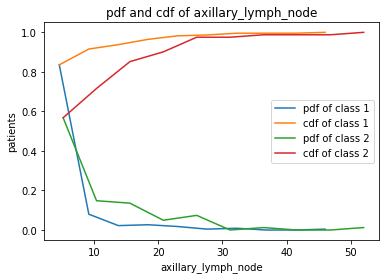

In [ ]:
one = data.loc[data['survival_status']==1]
two = data.loc[data['survival_status']==2]
counts,bin_edges = np.histogram(one['axillary_lymph_node'],bins =10,density= True)
pdf = counts/sum(counts)
cdf = np.cumsum(pdf)
plt.title('pdf and cdf of axillary_lymph_node')
plt.xlabel('axillary_lymph_node')
plt.ylabel('patients')
label = ["pdf of class 1", "cdf of class 1", "pdf of class 2", "cdf of class 2"]
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)

counts,bin_edges = np.histogram(two['axillary_lymph_node'],bins =10,density= True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)
plt.legend(label)

plt.show()

observations:

1.   almost 15 percent of people survived who's age was less than on equal to 37
2.   around 83 percent of people survived who had lymph nodes less than 5



Boxplots

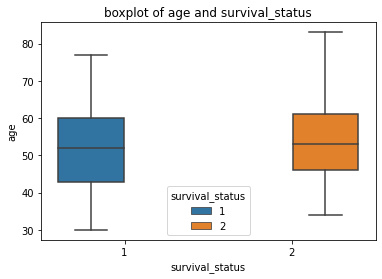

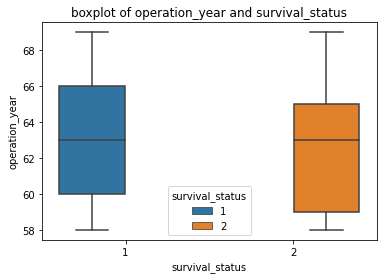

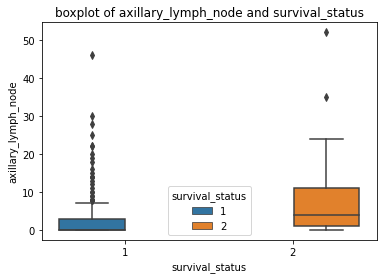

In [ ]:
sns.boxplot(x = 'survival_status',y = 'age',hue = 'survival_status',data = data).set_title('boxplot of age and survival_status')
plt.show()

sns.boxplot(x = 'survival_status',y = 'operation_year',hue = 'survival_status',data = data).set_title('boxplot of operation_year and survival_status')
plt.show()

sns.boxplot(x = 'survival_status',y = 'axillary_lymph_node',hue = 'survival_status',data = data).set_title('boxplot of axillary_lymph_node and survival_status')
plt.show()

Obbservations:


1.   the survival status is almost similar for the age group 40 to 60 
2.   no proper information about the survival status from the operation year 
3. high chances of people surviving more than 5 years who had lymph nodes 0 or  less than 5



Violin plots

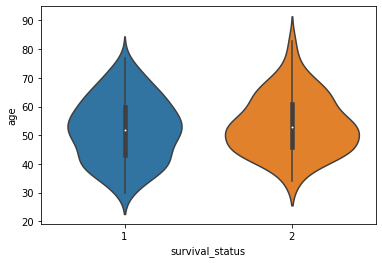

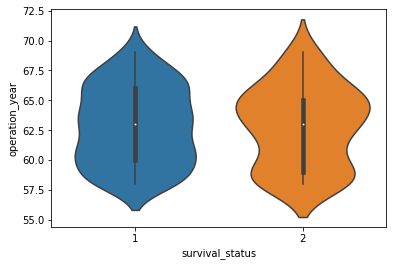

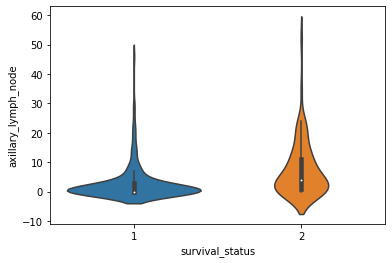

In [ ]:
sns.violinplot(x= 'survival_status',y = 'age',data = data , height = 10)
plt.show()
sns.violinplot(x= 'survival_status',y = 'operation_year',data = data , height = 10)
plt.show()
sns.violinplot(x= 'survival_status',y = 'axillary_lymph_node',data = data , height = 10)
plt.show()

Observations:


1. There were comparatively more people who got operated in the year 1965 did not survive for more than 5 years
2.Patients with more than 1 nodes are not likely to survive. More the number of nodes, lesser the survival chances
3.overlapping and similarities bitween the age group and operation_year found which do not give proper information about the survival_status



Bivariate Analysis(scatter plots and pair plots)

1-D scatter plot

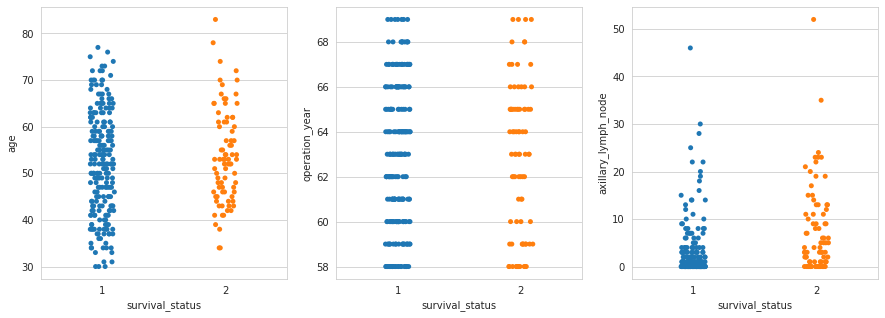

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
sns.set_style('whitegrid')
for idx, feature in enumerate(list(data.columns)[:-1]):
    sns.stripplot( x='survival_status', y=feature, 
                   data= data, ax=axes[idx], jitter=True)
plt.show()

2-D Scatter plot

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


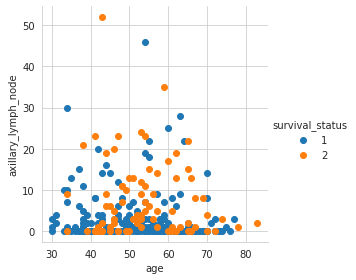

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


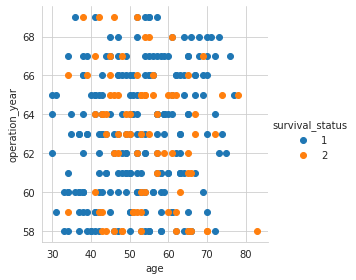

In [ ]:
sns.set_style('whitegrid')
sns.FacetGrid(data, hue='survival_status', size=4) \
   .map(plt.scatter, 'age', 'axillary_lymph_node') \
   .add_legend()
plt.show()
sns.set_style('whitegrid')
sns.FacetGrid(data, hue='survival_status', size=4) \
   .map(plt.scatter, 'age', 'operation_year') \
   .add_legend()
plt.show()

Observations:

1.   From the first plot it is clear that very less people have lymph nodes more than 30 
2.  patients with 0 or less than 5 nodes are more likely to survive irrespective of their ages
3. more number of people have not survived after the age of 50 having more than 5 lymph nodes



Pair Plots

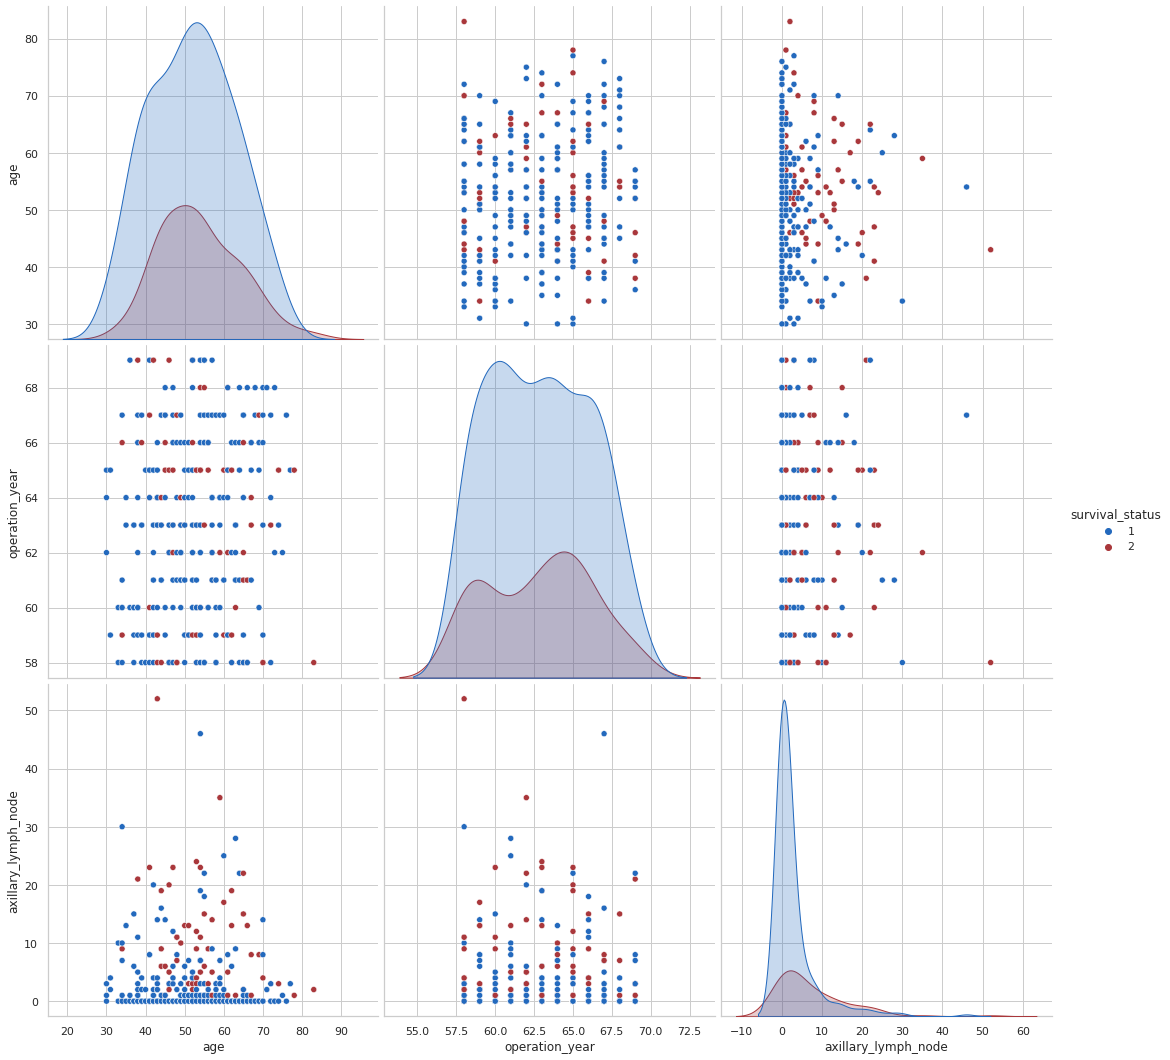

In [ ]:
sns.set_style('whitegrid')
sns.pairplot(data = data,hue = 'survival_status',vars = ["age", "operation_year", "axillary_lymph_node"],palette = 'vlag',height = 5)
plt.show()

Observations:


1.  A well seperation of lymph nodes and age is noted although few points are overlapping
2.  more no of points have been observed(survived more than 5 years) for lymph nodes close to zero




Conclusion:


1.  The patient's age, operation year alone are not useful for the patient's survival.
2.  patient's survival chances are maximum when the number of lymph nodes are minimum or zero.
3. max chances of survival having zero lymph nodes irrespective of age.
4. The objective of classifying the survival status of a new patient based on the given features is a difficult task as the data is imbalanced.

